# Get Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Define data path
path = 'TwiBot22_datasets.csv'

# Set display option to show full width of strings
pd.set_option('display.max_colwidth', None)

# Read data from .csv file
df = pd.read_csv(path, low_memory=False)

# Data Exploration

In [ ]:
# Get first 10 rows of data
df.head(10)

,created_at,description,entities,id,location,name,pinned_tweet_id,profile_image_url,protected,url,username,verified,withheld,followers_count,following_count,tweet_count,listed_count,label
0,2020-01-16 02:02:55+00:00,Theoretical Computer Scientist. See also https://t.co/EXWR5jOrFW and https://t.co/JEkxX4JHSw,"{'url': {'urls': [{'start': 0, 'end': 23, 'url': 'https://t.co/BoMip9FF17', 'expanded_url': 'https://www.boazbarak.org/', 'display_url': 'boazbarak.org'}]}, 'description': {'urls': [{'start': 41, 'end': 64, 'url': 'https://t.co/EXWR5jOrFW', 'expanded_url': 'http://windowsontheory.org', 'display_url': 'windowsontheory.org'}, {'start': 69, 'end': 92, 'url': 'https://t.co/JEkxX4JHSw', 'expanded_url': 'http://mltheory.org', 'display_url': 'mltheory.org'}]}}",u1217628182611927040,"Cambridge, MA",Boaz Barak,NaN,https://pbs.twimg.com/profile_images/1252262363132280834/ytIN-vzv_normal.jpg,False,https://t.co/BoMip9FF17,boazbaraktcs,False,NaN,7316,215,3098,69,human
1,2014-07-02 17:56:46+00:00,creative _,NaN,u2664730894,🎈,olawale 💨,NaN,https://pbs.twimg.com/profile_images/1478376381717401605/k4aboywe_normal.png,False,NaN,wale_io,False,NaN,123,1090,1823,0,human
2,2020-05-30 12:10:45+00:00,👽,NaN,u1266703520205549568,NaN,panagiota_.b,NaN,https://pbs.twimg.com/profile_images/1426086065165766662/KkzmeSXG_normal.jpg,False,NaN,b_panagiota,False,NaN,3,62,66,0,human
3,2019-01-26 13:52:49+00:00,"mama to maya. ABIM research pathway fellow @UVA_ID. interests in mobile health, patient engagement, and implementation science.","{'description': {'mentions': [{'start': 43, 'end': 50, 'username': 'UVA_ID'}]}}",u1089159225148882949,"Charlottesville, VA","Jacqueline Hodges, MD MPH",NaN,https://pbs.twimg.com/profile_images/1302291715898966019/KSgUqpz2_normal.jpg,False,NaN,jachodges_md,False,NaN,350,577,237,1,human
4,2009-04-30 19:01:42+00:00,Father / SWT Alumnus / Longhorn Fan,NaN,u36741729,United States,Matthew Stubblefield,NaN,https://pbs.twimg.com/profile_images/1458084621351112704/6S-ZgwIj_normal.jpg,True,NaN,Matthew_Brody,False,NaN,240,297,3713,8,bot
5,2021-02-27 05:01:12+00:00,"I am studying M.ScGENOMICS at Kamaraj University, Madurai.",NaN,u1365527332627247104,"Salem, Tamil Nadu, India",Sathish Kumar V,NaN,https://pbs.twimg.com/profile_images/1477211329001709569/uhUoxvWT_normal.jpg,True,NaN,vsathishkumar09,False,NaN,1,378,2,0,bot
6,2013-08-18 04:21:48+00:00,NaN,"{'url': {'urls': [{'start': 0, 'end': 23, 'url': 'https://t.co/V3FyRYAsvK', 'expanded_url': 'http://www.youtube.com/c/grian', 'display_url': 'youtube.com/c/grian'}]}}",u1679822588,🇬🇧,Grian,1.143808e+18,https://pbs.twimg.com/profile_images/1007734613630947330/rj3Jkwed_normal.jpg,False,https://t.co/V3FyRYAsvK,GrianMC,False,NaN,238254,293,1400,448,bot
7,2013-06-15 11:34:55+00:00,The hottest brownboy in the game. UCT🏛,NaN,u1519144464,"Umhlanga, South Africa",Nikhil Sewdass,NaN,https://pbs.twimg.com/profile_images/1463106911562354688/QmIbBIhm_normal.jpg,False,NaN,NikhilSewdass,False,NaN,161,278,788,0,human
8,2008-06-23 20:59:59+00:00,"Director, Knowledge Ecology International, an NGO working on knowledge governance","{'url': {'urls': [{'start': 0, 'end': 23, 'url': 'https://t.co/mcNZxOR7gv', 'expanded_url': 'http://www.keionline.org/jamie', 'display_url': 'keionline.org/jamie'}]}}",u15211869,"ÜT: 38.911326,-77.04508",James Love,1.335259e+18,https://pbs.twimg.com/profile_images/1261384539768860675/gnc82KB1_normal.jpg,False,https://t.co/mcNZxOR7gv,jamie_love,True,NaN,10299,2166,57397,383,human
9,2020-09-24 07:39:51+00:00,well busy,NaN,u1309034737756000256,NaN,Michael Goves Coke Dealer,NaN,https://pbs.twimg.com/profile_images/1309035532287172611/KsSfMoo8_normal.jpg,False,NaN,CokeGoves,False,NaN,217,233,27,0,human


In [ ]:
# Get data infomation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 18 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   created_at         1000000 non-null  object 
 1   description        875738 non-null   object 
 2   entities           630750 non-null   object 
 3   id                 1000000 non-null  object 
 4   location           708436 non-null   object 
 5   name               999898 non-null   object 
 6   pinned_tweet_id    389865 non-null   float64
 7   profile_image_url  999931 non-null   object 
 8   protected          1000000 non-null  bool   
 9   url                516923 non-null   object 
 10  username           1000000 non-null  object 
 11  verified           1000000 non-null  bool   
 12  withheld           59 non-null       object 
 13  followers_count    1000000 non-null  int64  
 14  following_count    1000000 non-null  int64  
 15  tweet_count        1000000 non-nu

In [ ]:
# Data describe
df.describe()

,pinned_tweet_id,followers_count,following_count,tweet_count,listed_count
count,3.898650e+05,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000
mean,1.332169e+18,4.123015e+04,2.250534e+03,2.168910e+04,179.475490
std,2.074637e+17,6.020776e+05,1.578238e+04,1.202469e+05,1412.031522
min,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.275749e+18,1.550000e+02,2.060000e+02,3.650000e+02,1.000000
50%,1.416844e+18,9.280000e+02,6.420000e+02,3.126000e+03,9.000000
75%,1.473457e+18,5.038000e+03,1.706000e+03,1.540125e+04,74.000000
max,1.503541e+18,1.306131e+08,4.161031e+06,8.020813e+07,539401.000000


## Filter unnecessary columns

In [ ]:
# Get all not Null value of feature withheld
df[df['withheld'].notnull()]['withheld']

4478                                                                                                                                                                  {'country_codes': ['TR']}
66500                                                                                                                                                                 {'country_codes': ['TR']}
72958                                                                                                                                                                 {'country_codes': ['TR']}
157042                                                                                                                                                                {'country_codes': ['RU']}
176842                                                                                                                                                                {'country_codes': ['TR']}
180212                                  

## Checking multicollinearity

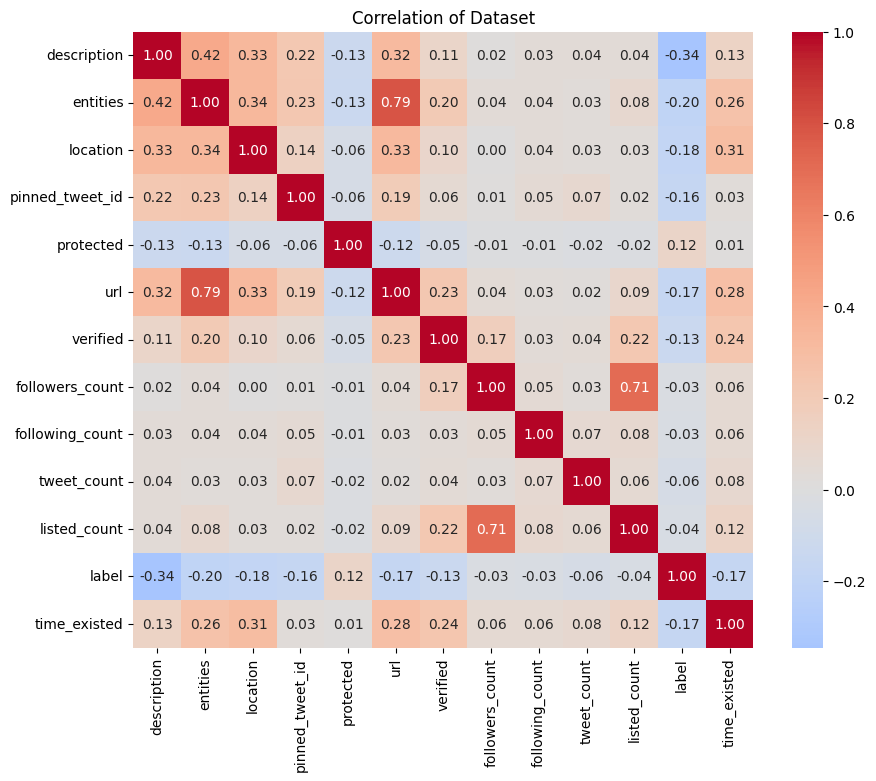

In [ ]:
numerical_data = df

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")

# Add labels and title
plt.title('Correlation of Dataset')

# Show the plot
plt.show()

## Ranking features importance

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier

# Construct numerical data
X_numerical = numerical_data.drop('label', axis=1)
y_numerical = numerical_data['label']

# Split into train and test
X_numerical_train, X_numerical_test, y_numerical_train, y_numerical_test = train_test_split(X_numerical, y_numerical, test_size=0.2, random_state=42)

# Create model
dtc = DecisionTreeClassifier(random_state=42)

# Fit to data
dtc.fit(X_numerical_train, y_numerical_train)

# Loop for calculate importance of each features
result = permutation_importance(
    dtc, X_numerical_test, y_numerical_test, n_repeats=15, random_state=42
)

# Display result
print(pd.DataFrame(
    {k: result[k] for k in ("importances_mean", "importances_std",)},
    index=X_numerical_test.columns
).sort_values(by="importances_mean", ascending=False))

                 importances_mean  importances_std
followers_count          0.070019         0.000782
listed_count             0.027294         0.000645
following_count          0.020278         0.000722
tweet_count              0.016833         0.000744
description              0.014884         0.000390
time_existed             0.010264         0.000635
verified                 0.002397         0.000112
entities                 0.002288         0.000172
protected                0.002221         0.000148
pinned_tweet_id          0.001673         0.000136
location                 0.000712         0.000229


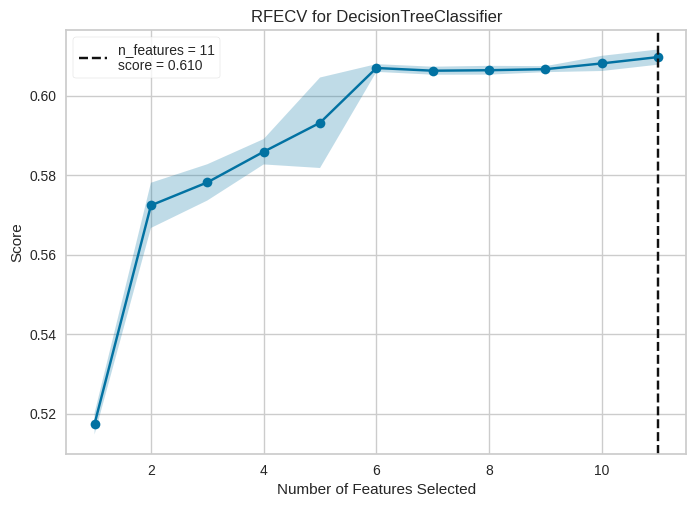

In [ ]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import rfecv

# Performs recursive feature elimination with cross-validation to determine an optimal number of features
cv = StratifiedKFold(3)
visualizer = rfecv(dtc, X=X_numerical, y=y_numerical, cv=cv, scoring='f1_macro')

## Data Balance Checking

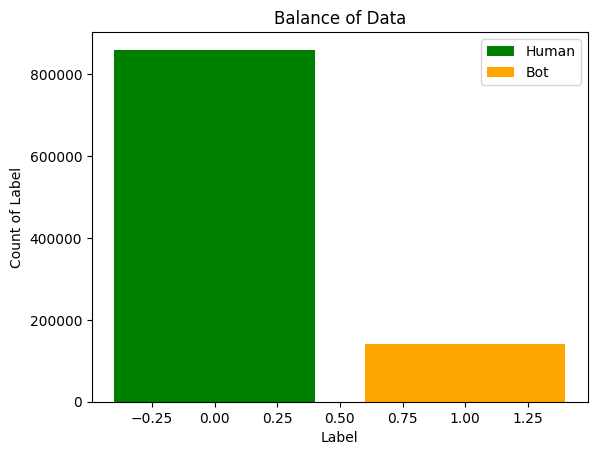

In [ ]:
# # Checking the balance of data
# Get all label
label = df['label'].unique()

# Get numbers of each label
num_of_label = df['label'].value_counts()

# Set color
colors = ['green', 'orange']

# Plot
bars = plt.bar(label, num_of_label, color=colors)
plt.xlabel("Label")
plt.ylabel("Count of Label")
plt.title("Balance of Data")

# Add legend
plt.legend(handles=[bars[0], bars[1]], labels=['Human', 'Bot'])

# Display plot
plt.show()

In [ ]:
num_of_label

label
0    860057
1    139943
Name: count, dtype: int64